# Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [174]:
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LogisticRegression
from scipy.io import arff

from algo_implementation import logistic_regression
from preprocessor import Preprocessor

# library & dataset
import seaborn as sns
import matplotlib.pyplot as plt


# Dataset 2 preparation

## Preprocessing

In [242]:
# read data from csv file
data2 = pd.read_csv('CarOwnership.csv', decimal=',')

In [243]:
finance_status_dict = {'Excellent': 5, 'Good': 4, 'Fair': 3, 'Stable': 2, 'Unstable': 1, 'Poor': 0}
data2['Finance Status'] = data2['Finance Status'].map(finance_status_dict)

In [244]:
data2["Monthly Income"] = data2["Monthly Income"].str.replace("$|,|USD|usd| ", "").str.replace('$', '')


C:\Users\mikol\AppData\Local\Temp\ipykernel_13300\2778364200.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data2["Monthly Income"] = data2["Monthly Income"].str.replace("$|,|USD|usd| ", "").str.replace('$', '')
C:\Users\mikol\AppData\Local\Temp\ipykernel_13300\2778364200.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data2["Monthly Income"] = data2["Monthly Income"].str.replace("$|,|USD|usd| ", "").str.replace('$', '')


In [245]:
data2.Car = data2.Car.replace({'Yes': 1, 'No': 0}) 

In [246]:
for i in (data2['Monthly Income']).index:
    if type(data2['Monthly Income'][i]) == str:
        if (data2['Monthly Income'][i]).__contains__('k'):
            data2['Monthly Income'][i] = (data2['Monthly Income'][i]).replace('k', '')
            data2['Monthly Income'][i] = float(data2['Monthly Income'][i]) * 1000

C:\Users\mikol\AppData\Local\Temp\ipykernel_13300\1876470561.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['Monthly Income'][i] = (data2['Monthly Income'][i]).replace('k', '')
C:\Users\mikol\AppData\Local\Temp\ipykernel_13300\1876470561.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['Monthly Income'][i] = float(data2['Monthly Income'][i]) * 1000


In [247]:
data2.loc[data2['Monthly Income'] == "" ,'Monthly Income'] = np.nan

In [248]:
data2['Monthly Income'] = data2['Monthly Income'].astype(float)

In [249]:
data2['Monthly Income'] = data2['Monthly Income'].fillna(int(data2['Monthly Income'].mean()))

In [269]:
data2['Years of Employment'] = data2['Years of Employment'].str.replace('years', '').str.replace('year', '').str.replace(' ', '').str.replace('y', '')

C:\Users\mikol\AppData\Local\Temp\ipykernel_13300\1665349502.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['Years of Employment'] = data2['Years of Employment'].str.replace('years', '').str.replace('year', '').str.replace(' ', '').str.replace('y', '')


In [251]:

data2['Finance Status'] = data2['Finance Status'].fillna(data2['Finance Status'].mode()[0])

In [252]:
fin_status_dict = {
    'Excellent': 'Excellent',
    'Good': 'Good',
    'Fair': 'Fair',
    'Poor': 'Poor',
    'Late payments, collections': 'Very bad',
    'Late payments, collections, charge-offs': 'Very bad',
    'Missed payments, collections, charge-offs': 'Very bad',
    'Missed payments in the past': 'Very bad',
    'Late payments': 'Very bad',
    'Late payment': 'Very bad',
    'No significant issues': 'Excellent',
    'No significant issue': 'Excellent',
    'No issues': 'Excellent',
    'Late payment 1 month ago': 'Poor',
    'Late payment 2 months ago': 'Poor',
    'Late payment 3 months ago': 'Poor',
    'Late payment 6 months ago': 'Poor',
}


In [253]:
data2['Finance History'] = data2['Finance History'].map(fin_status_dict)

In [254]:
data2['Finance History'] = data2['Finance History'].fillna('Fair')

In [255]:
fin_status_num_dict = {
    'Excellent': 5,
    'Good': 4,
    'Fair': 3,
    'Poor': 2,
    'Very bad': 1,
}

In [256]:
data2['Finance History'] = data2['Finance History'].map(fin_status_num_dict)

In [257]:
data2.isna().sum()

Monthly Income           0
Credit Score            40
Years of Employment     43
Finance Status           0
Finance History          0
Car                     20
Number of Children     125
dtype: int64

In [258]:
data2['Credit Score'] = data2['Credit Score'].fillna(data2['Credit Score'].mode()[0])
data2['Years of Employment'] = data2['Years of Employment'].fillna(data2['Years of Employment'].mode()[0])
data2 = data2[~data2.Car.isna()]


In [270]:
data2.isna().sum()

Monthly Income         0
Credit Score           0
Years of Employment    0
Finance Status         0
Finance History        0
Car                    0
Number of Children     0
dtype: int64

In [261]:
data2['Number of Children'] = (data2['Number of Children']).str.replace('na','0')
data2['Number of Children'] = data2['Number of Children'].fillna(0)

C:\Users\mikol\AppData\Local\Temp\ipykernel_13300\1148009594.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['Number of Children'] = (data2['Number of Children']).str.replace('na','0')
C:\Users\mikol\AppData\Local\Temp\ipykernel_13300\1148009594.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['Number of Children'] = data2['Number of Children'].fillna(0)


In [273]:
data2 = data2.astype(float)

## Split

In [274]:
X = data2.drop(['Car'], axis=1)
y = data2['Car']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size = 0.2)

## Correlation

In [275]:
X.corr()

,Monthly Income,Credit Score,Years of Employment,Finance Status,Finance History,Number of Children
Monthly Income,1.000000,0.363851,0.653650,0.414824,0.119096,0.077749
Credit Score,0.363851,1.000000,0.812616,0.479355,0.621284,0.102525
Years of Employment,0.653650,0.812616,1.000000,0.516056,0.533057,0.138289
Finance Status,0.414824,0.479355,0.516056,1.000000,0.368897,-0.146875
Finance History,0.119096,0.621284,0.533057,0.368897,1.000000,0.081268
Number of Children,0.077749,0.102525,0.138289,-0.146875,0.081268,1.000000


<AxesSubplot: >

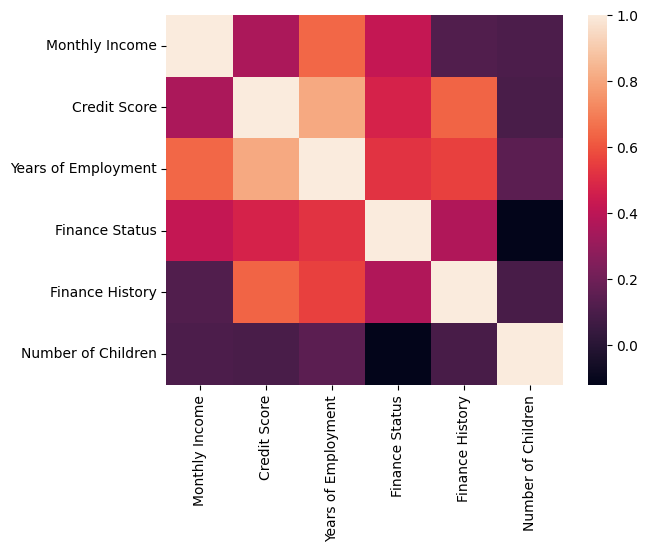

In [276]:
sns.heatmap(X_train.corr())

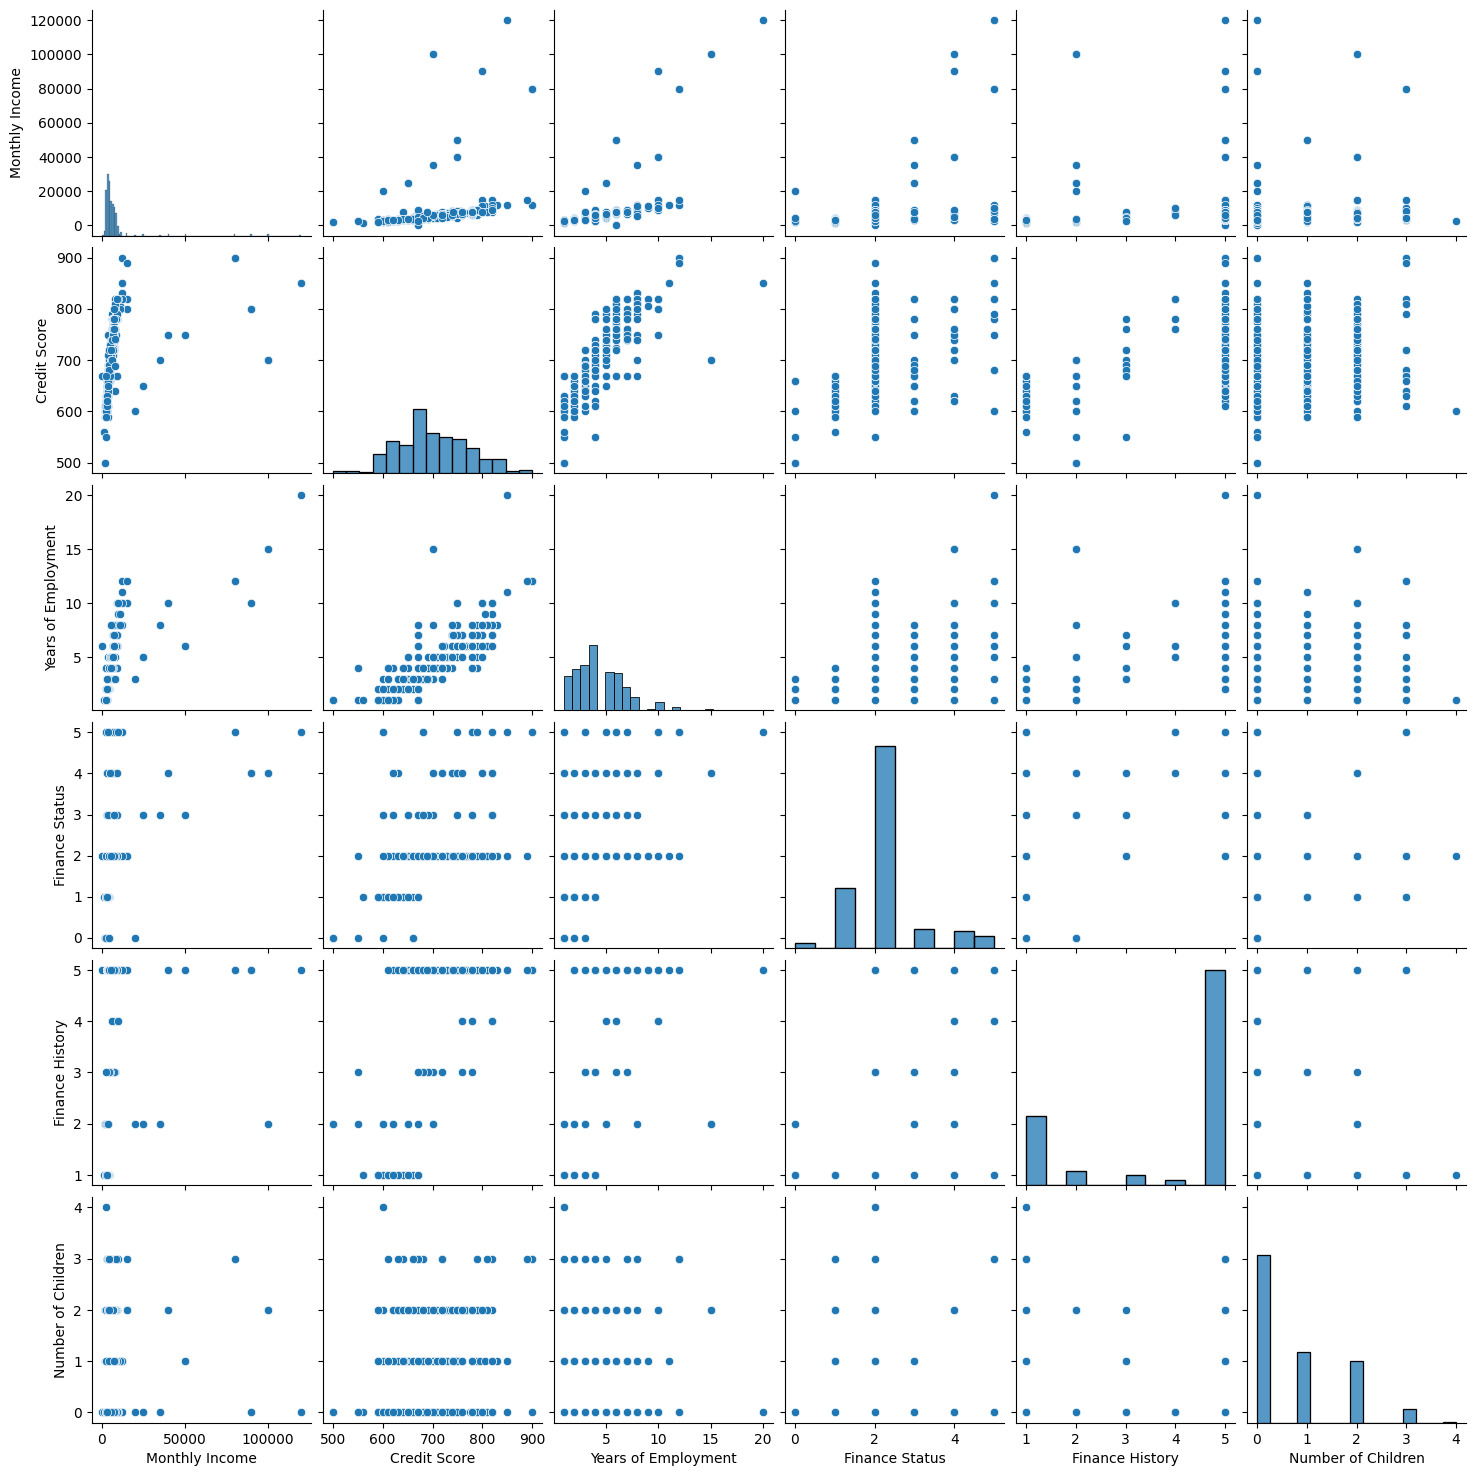

In [277]:
# Basic correlogram
sns.pairplot(X_train)


In [278]:
p = Preprocessor()
vif_coefs = p.vif(X_train)
vif_coefs[vif_coefs['VIF'] >= 0]

,variables,VIF
0,Monthly Income,2.843131
1,Credit Score,13.550763
2,Years of Employment,12.151648
3,Finance Status,9.082750
4,Finance History,11.350822
5,Number of Children,1.794046


In [279]:
# standarize data
X_train_stded = (X_train - X_train.mean()) / X_train.std()
# standariz test data with train data mean and std
X_test_stded = (X_test - X_train.mean()) / X_train.std()

In [283]:
vif_coefs = p.vif(X_train_stded)
vif_coefs[vif_coefs['VIF'] >= 5]
# neglectable

,variables,VIF
2,Years of Employment,5.534202


## Export data to csv

In [287]:
pd.concat([X_train_stded, y_train], axis=1).to_csv('train_dataset2.csv')
pd.concat([X_test_stded, y_test], axis=1).to_csv('test_dataset2.csv')

In [289]:
pd.concat([X_train_stded, y_train], axis=1)

,Monthly Income,Credit Score,Years of Employment,Finance Status,Finance History,Number of Children,Car
390,-0.229254,-0.105382,-0.151055,-0.069367,0.650403,-0.810921,1.0
276,0.338940,2.935116,2.963319,3.127068,0.650403,-0.810921,1.0
245,0.108591,1.172509,1.016835,-0.069367,0.650403,1.329241,1.0
208,-0.313715,-0.736983,-0.540352,-0.069367,0.650403,0.259160,0.0
223,-0.375141,-1.324518,-0.151055,-1.134845,-1.705773,0.259160,0.0
...,...,...,...,...,...,...,...
335,-0.375141,-0.443215,-1.318946,-1.134845,-1.705773,-0.810921,0.0
200,-0.259967,0.291205,-0.151055,-0.069367,0.650403,2.399322,1.0
122,-0.006583,1.172509,1.016835,-0.069367,0.650403,-0.810921,1.0
49,-0.137114,0.291205,-0.151055,-0.069367,0.650403,-0.810921,1.0
